# UCCS TKET Workshop: Day 3


Kathrin Spendier (Quantum Evangelist) → kathrin.spendier@quantinuum.com,

Notebook and slides available at: → https://github.com/spendierk/UCCS-TKET-workshop-2022

## Day 3 Workshop Contents

We will cover the following:
1. The RSA cryptosystem 
2. The Shor's factoring algorithm 
3. How does Shor's factoring algorithm work?
4. A bit more coding details 
5. Current State of Implementing Shor's Algorithm
6. Closing Remarks

# The RSA cryptosystem


RSA is an algorithm which enables one group to encrypt and decrypt data while restricting another to only decrypting. The algorithm was published in the 70’s by Ron Rivest, Adi Shamir, and Leonard Adleman, hence RSA.

- RSA is a special type of function referred to as an asymmetric algorithm — the mathematics required to encrypt the data is straightforward for a computer, but decrypting the data takes an unreasonably large amount of computing resources.
</br> </br>
- Two distinct pieces of information are required to obtain the full range of the RSA function, a public and a private key.
</br> </br>
- RSA’s public key derives from the two product of two large prime numbers, which is available to anyone publicly for encrypting data. However, only people with the actual prime numbers themselves can decrypt the data; this is called the private key. 

Here is a [post](https://hackernoon.com/how-does-rsa-work-f44918df914b) on how RSA works.
Here is a [small RSA code example](https://ccom.uprrp.edu/~humberto/very-small-rsa-example.html).

##  Prime factorization

- A prime number (or a prime) is a natural number greater than 1 that is not a product of two smaller natural numbers.
- Prime factorization is a process of writing all numbers as a product of primes. 
 
 $N = P_1^{e_1} P_2^{e_2} ... P_k^{e_k}$
 
 Here $P$'s are the primes that divide $N$, $e$'s are the powers
 
 $N = 60 = 2^2 \times 3^1 \times 5^1 $
 

## RSA number n

The most difficult case of the factoring problem is when $n$ is a product of two primes $p$ and $q$ where the prime's are roughly equal in length so that the primes are as large as possible this is the case of the factoring problem that's used in the RSA.

 $n = p \times q$

## RSA Factoring Challenge

To encourage research into integer factorization, the "RSA Factoring Challenges" were created in 1991. These challenges consisted of challenge integers of varying sizes, named for the number of integer digits:
https://www.wikiwand.com/en/RSA_Factoring_Challenge

RSA-250 cryptographic challenge broken in 2020:
- This integer is the product of two prime numbers, each with 125 decimal digits (829 binary bits). 
- In total, it took 2700 years of running powerful computer cores to carry out the computation, which was done on tens of thousands of machines around the world over the course of a few months. ( 2700 CPU core-years, using a 2.1 GHz Intel Xeon Gold 6130 CPU)

## RSA-250 (broken in 2020)

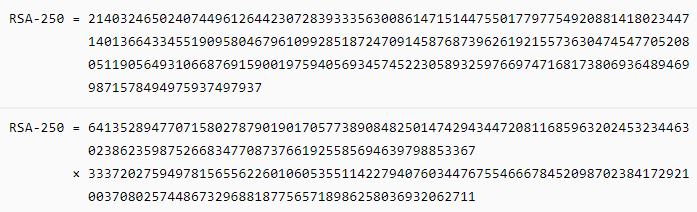

## RSA-2048 (current practice)

RSA-2048 has 617 decimal digits (2,048 bits). It is the largest of the RSA numbers. The RSA-2048 may not be factorizable for many years to come, unless considerable advances are made in integer factorization or computational power in the near future.

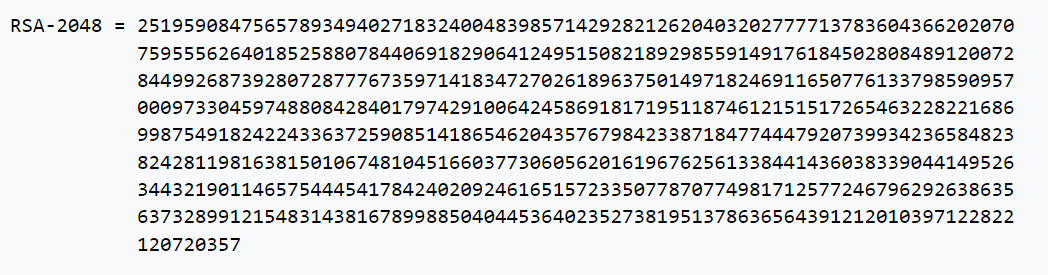

## Complexity of factoring

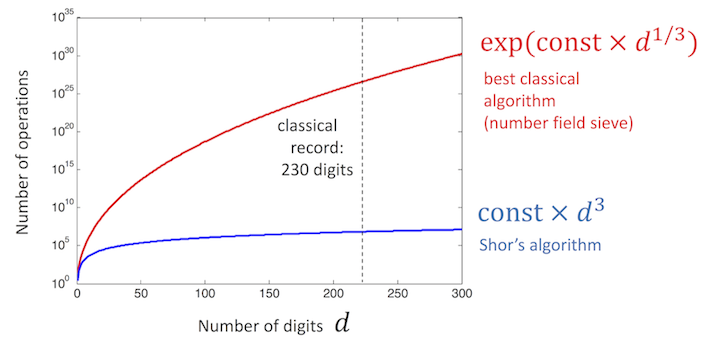

## Classical code

This algorithm effectively finds the $P/Q$ factors of a small RSA key. 

In [1]:
import math
def get_factors_of(num):
    poss_p = math.floor(math.sqrt(num)) 

    if poss_p % 2 == 0: # Only checks odd numbers, it reduces time by orders of magnitude
        poss_p += 1
    while poss_p < num:
        if num % poss_p == 0:
            return poss_p
        poss_p += 2

In [2]:
N = 145   #15, 21, 35, 145
P = get_factors_of(N)
Q = N/P

print(N,P,Q)

145 29 5.0


# The Shor's factoring algorithm 

The Shor's factoring algorithm is probably the most famous quantum algorithm there is.

This algorithm is the source of much interest in the quantum community — one day perhaps a few decades in the future, these devices would be able to use Shor’s algorithm to crack RSA.

Shor, P. W. (1999). Polynomial-time algorithms for prime factorization and discrete logarithms on a quantum computer. SIAM review, 41(2), 303-332. [https://arxiv.org/abs/quant-ph/9508027]

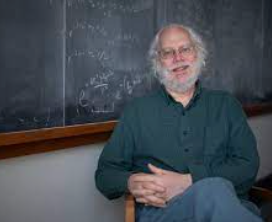

## A quick way implementing Shor's Algorithm

Qiskit has a [pre-built algorithm](https://qiskit.org/documentation/tutorials/algorithms/08_factorizers.html) that you can use for experimentation.

In [3]:
#pip install qiskit   #run this to install qiskit IBM's quantum SDK

import math
import numpy as np
from qiskit import Aer
from qiskit.utils import QuantumInstance
from qiskit.algorithms import Shor

In [4]:
N = 15   #15, 21,35
backend = Aer.get_backend('aer_simulator')
quantum_instance = QuantumInstance(backend, shots=1024)
shor = Shor(quantum_instance=quantum_instance)
result = shor.factor(N)
print(f"The list of factors of {N} as computed by the Shor's algorithm is {result.factors[0]}.")

The list of factors of 15 as computed by the Shor's algorithm is [3, 5].


Note: this implementation of Shor’s algorithm uses $4n+2$ qubits, where $n$ is the number of bits representing the integer in binary, i.e. 4 bits for 15. So in practice, for now, this implementation is restricted to factorizing small integers. Given the above value of $N=15$ we compute $4n+2=18$.

In [5]:
print(f'Computed number of qubits for circuit: {4 * math.ceil(math.log(N, 2)) + 2}')
print(f'Actual number of qubits of circuit: {shor.construct_circuit(N).num_qubits}')

Computed number of qubits for circuit: 18
Actual number of qubits of circuit: 18


In [6]:
### draw circuit - not very informative

#shor.construct_circuit(N).draw(output='mpl')

# How does Shor's factoring algorithm work?

We need to understand the mathematics of number theory (which is out of the scope here).

### Very high level ideas

To factor a given number, Shor’s algorithm starts with a random bad guess that might share a factor with your target number, (but which probably doesn’t), and then the algorithm transforms it into a much better guess that probably DOES share a factor.


There’s nothing intrinsically quantum mechanical about this - you can, in fact, run a version of Shor’s algorithm on a regular computer to factor big numbers, but the “turning your bad guess into a better guess” part of the process takes a very very long time on a normal computer for large $N$. On the other hand, this key step happens to be ridiculouslycan be fast on quantum computers.

## Euclid’s algorithm

Find a factor of $N$, we don't have to guess a factor of $N$ - guessing numbers that share factors with $N$ works, too, thanks to Euclid.

$N = g \times h $

$N = f_1 \times f_2 $

$g = f_1 \times c $     


If Euclid’s algorithm found any shared factors with $N$, then we’d be done!

$gcd(N,g) = ? $

The Euclidean algorithm is a way to find the greatest common divisor (gcd) of two positive integers.

You could just divide $N$ by that factor to get the other factor and break the encryption. But for the big numbers used in encryption, it’s astronomically unlikely that any single guess will actually share a factor with $N$.

## Making a better guess


$g$ = unlikely to share factos with $N$

$g^{p/2} \pm 1$ = likely to share factos with $N$

because if $A,B$ are integers and don't share factors

$A \times A \times A \times ... \times A = something \times B + 1 $

$A^p = m \times B +1$  (unfortunately we don't have time to show why this is true)

## Making a better guess

crappy guess $g$ to find $N$

$g^p=m \times N+1$

$g^p-1=m \times N$

$(g^p-1)(g^p+1) =m \times N $ 

### Shor's Algorithm

$g \to g^{p/2} \pm 1$

There are restrictions:

$g$ chosen randomly,

$p$ is must be even,

$g^{p/2} \pm 1$ cannot be a multiple of $N$.

There is 37.5% chance that $g^{p/2} \pm 1$ does generate guesses that share factors with $N$. Which means we’re 99% likely to break the encryption with fewer than 10 guesses.


## Speeding up guessing

To turn a bad guess $g$ into a good guess $g^{p/2} \pm 1$ we need to know how many times you have to multiply our guess $g$ by itself before we get a multiple of $N$, plus 1.

$g \times g \times g \times ... \times = m \times N +1$

And for a regular computer, finding that power $p$ takes a ton of work and time for big numbers, i.e., $N$ is 1000 digits long, and our bad guess is 500 digits long. It could take more effort than just trying to factor $N$ by brute force methods.

## This is where quantum mechanics comes in to speed things up

Unlike a normal computation which gives only one answer for a given input, a quantum computation can simultaneously calculate a bunch of possible answers for a single input by using a quantum superposition.

The key behind fast quantum computations is to set up a quantum superposition that calculates all possible answers at once while being cleverly arranged so that all of the wrong answers destructively interfere with each other.


## The "repeating property" trick

if

$g^x = m \times N +r$

then

$g^{x+p} = m_2 \times N +r$

So $p$ has a "repeating property":
If we take our bad guess $g$ and raise it to a power of $x$ and add or subtract $p$ or multiples of $p$ from $x$ the amount more, hereh $r$, from a multiple of $N$ stays the same. 

This repeating property is a structural relationship between different powers that can be nicely encoded in quantum computation. 

## Quantum Fourier Transform

We need to create a quantum superposition of numbers that repeat periodically with a period of $p$, or equivalently, they repeat with a frequency of $1/p$ . If we can find the frequency, we can find p and break the encryption

$f = \frac{1}{period} = \frac{1}{p}$

Apply the Quantum Fourier Transform to our superposition that repeats with a frequency of $1/p$ to cause all the different possible wrong frequencies to destructively interfere, leaving us with a single quantum state: the number $1/p$.

## Shor's Algorithm Recap

1. Guess $g$
</br> </br>
2. Input $g$ into a quantum algorithm based on QFT and compute $p$ such that $g^p = m \times N +1 $. Note that $p$ must be even.
</br> </br>
3. Better guess $g^{p/2} \pm 1$ which cannot be a multiple of $N$
</br> </br>
4. Use Euclid’s algorithm to find factors of $N$.

Very complicated and for more detail see here:</br>
https://www.youtube.com/watch?v=oOHHde-REtw</br>
https://www.youtube.com/watch?v=_zTY_Rhb2Js</br>
https://www.youtube.com/watch?v=MbZW1AqBNGk

# A bit more coding details  

Shor's algorithm that is implemented on a QC can be broken up into three parts.

1. Convert the factoring problem into a period finding problem using what's called the modular exponentiation function.
</br> </br>
2. Find the period of the modular exponentiation function using the Quantum Fourier Transform.
</br> </br>
3. Once we found the period we can use this number to efficiently compute the factors.


## Problem of Period Finding

A factoring problem can be turned into a period finding problem in polynomial time.

If we can compute the period of $f(x) = g^x (mod N)$ efficiently, then we can also efficiently factor. 

Let’s look at the periodic function:
    $f(x) = g^p (mod N)$
    
Example: $N$ = 21, $g$ = 2, then period is $p=6$.

$2^6(mod21) = 1$

64/21 = 3 with remainder 1


We can see an example of this function $g^p (mod N) = 1$ plotted on the graph below.

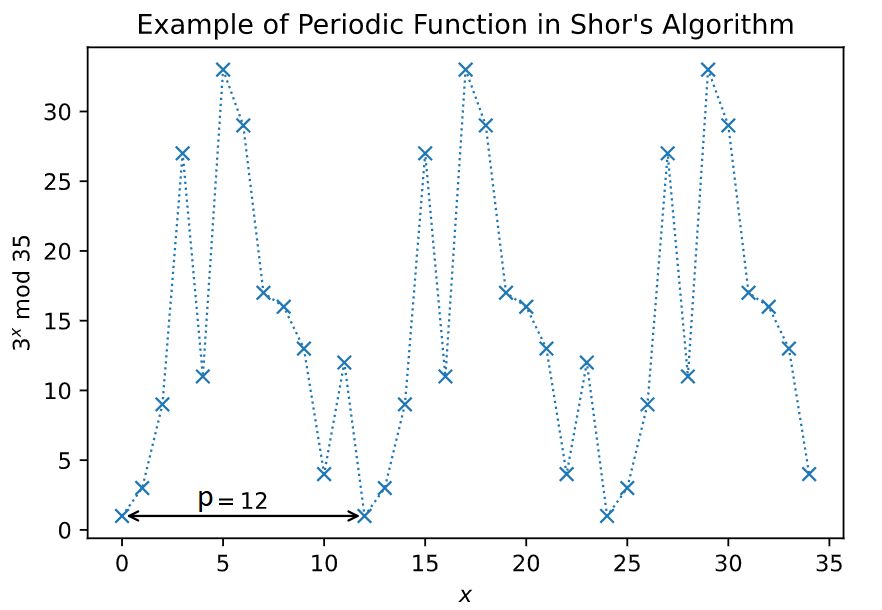

## Period-Finding Circuit

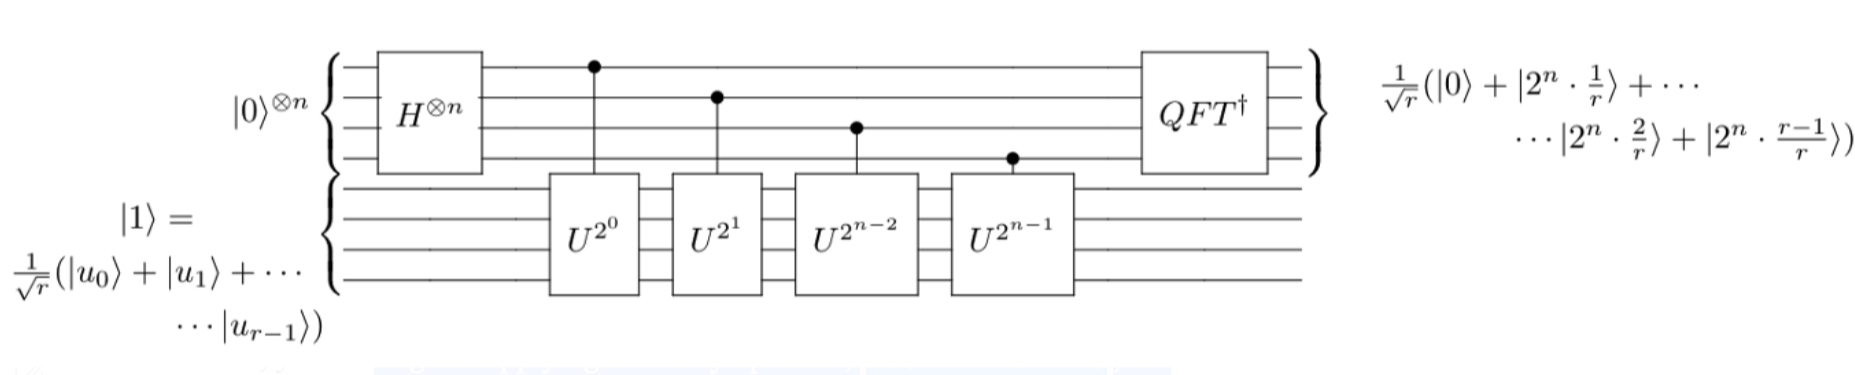

First, you notice the measurement qubits, $|0>$, are all being initialized with Hadamard ($H$) gates and the target qubits are being initialized at $|1>$.

We will keep using Qiskit since it is useful to look at the Shor's Qiskit documentation [here](https://qiskit.org/textbook/ch-algorithms/shor.html).

In [7]:
#pip install qiskit

from qiskit import QuantumCircuit, Aer, execute


In [8]:
def initialize_qubits(qc, n, m):
    qc.h(range(n)) # apply hadamard gates
    qc.x(n+m-1) # set qubit to 1
    

Find the period of $f(x) = g^p (mod N)$, where $p$ is the function’s period

$U$ gates applying a unitary operator, $U(x) = g^p (mod N)$, on the target qubits controlled by the measurement qubits, which in your case is

In [9]:

print(f"Which in your case is\n\tU(p) = g^p mod {N}")
# a = g and x = p
def a_x_mod15(a, x):
    if a not in [2,7,8,11,13]:
        raise ValueError("'a' must be 2,7,8,11 or 13")
    U = QuantumCircuit(4)        
    for iteration in range(x):
        if a in [2,13]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
        if a in [7,8]:
            U.swap(2,3)
            U.swap(1,2)
            U.swap(0,1)
        if a == 11:
            U.swap(1,3)
            U.swap(0,2)
        if a in [7,11,13]:
            for q in range(4):
                U.x(q)
    U = U.to_gate()
    U.name = f"U({x})"
    c_U = U.control()
    return c_U
def modular_exponentiation(qc, n, m, a): #Modular exponentiation is exponentiation performed over a modulus.
    for x in range(n):
        exponent = 2**x
        qc.append(a_x_mod15(a, exponent), 
                     [x] + list(range(n, n+m)))

Which in your case is
	U(p) = g^p mod 15


Third, you perform an inverse quantum Fourier transform on the measurement qubits.

In [10]:
from qiskit.circuit.library import QFT

def apply_iqft(qc, measurement_qubits):
    qc.append(QFT(len(measurement_qubits),
                             do_swaps=False).inverse(),
                         measurement_qubits)

Fourth, you measure the measurement qubits to hopefully return an exponent, $p$, which satisfies $f(p) = g^p (mod N)$.

In [11]:
def measure(qc, n):
    qc.measure(n, n)

Finally, you assemble the circuit,

In [12]:
def period_finder(n, m, a):
    
    # set up quantum circuit
    qc = QuantumCircuit(n+m, n)
    
    # initialize the qubits
    initialize_qubits(qc, n, m)
    qc.barrier()

    # apply modular exponentiation
    modular_exponentiation(qc, n, m, a)
    qc.barrier()

    # apply inverse QFT
    apply_iqft(qc, range(n))
    qc.barrier()

    # measure the n measurement qubits
    measure(qc, range(n))
    
    return qc

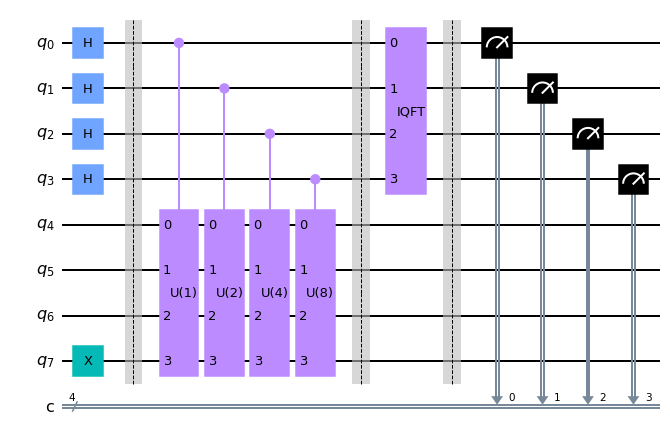

In [17]:
n = 4; m = 4; a = 11;
# 'a' must be 2,7,8,11 or 13"

qc = period_finder(n, m, a)
qc.draw(output='mpl')


run the circuit,

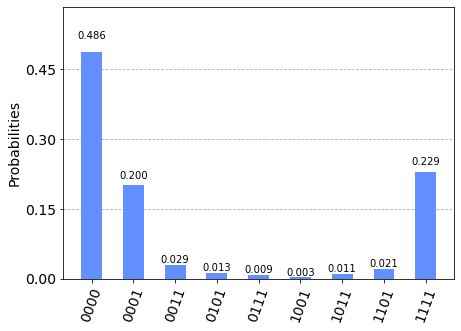

In [14]:
from qiskit.tools.visualization import plot_histogram

simulator = Aer.get_backend('qasm_simulator')
counts = execute(qc, backend=simulator).result().get_counts(qc)

plot_histogram(counts)


In [15]:
# convert and add binary periods to list
counts_dec = sorted([int(measured_value[::-1], 2)
                     for measured_value in counts])

print("Measured periods:", end='\t')
for measured_value in counts_dec:
    print(measured_value, end='\t')
    

Measured periods:	0	8	9	10	11	12	13	14	15	

## Factoring N

Now, you sort through the possible exponents, finding those which satisfy two constraints:

1. the exponent, $x$, must be even and
2. $a^{x/2} + 1 ≠ 0$ (mod N)
3. Using an applicable period, $x$, you can find nontrivial factors, $P$ and $Q$ , of $N$ with $gcd(a^{x/2} ± 1, N)$ .

In [16]:
factors = set()
periods = counts_dec;

for x in periods:
    guesses = [math.gcd(int((a ** (measured_value/2))) + 1, N),
               math.gcd(int((a ** (measured_value/2))) - 1, N)]
    for guess in guesses:
        # ignore trivial factors
        if guess != 1 and guess != N and N % guess == 0:
            factors.add(guess)

if len(factors):
    P = factors.pop()
    Q = factors.pop() if len(factors) else N // P
    print(f"P = {P}\nQ = {Q}\n\n",
          f"{P} x {Q} = {N}, {P * Q == N}")
else:
    print("Shor's Algorithm Failed. Choose a different 'a'.")

P = 5
Q = 3

 5 x 3 = 15, True


# Current State of Implementing Shor's Algorithm

- Shor's algorithm was demonstrated in 2001 by a group at IBM, which factored 15 into 3 and 5, using a quantum computer with 7 qubits. 
https://www.nature.com/articles/414883a
</br> </br>
- Using this same method, with better quantum computers, we can now factor 21 and 35. 
https://quantum-computing.ibm.com/composer/docs/iqx/guide/shors-algorithm
</br> </br>
- Other, more advanced methods can factor 291311 with 3 qubits.
https://arxiv.org/abs/1706.08061
</br> </br>
- We would still need 2000 times more quantum memory to factor even some of the smaller of the really big numbers used in modern encryption.

## RSA-230: need 5900 quantum bits 

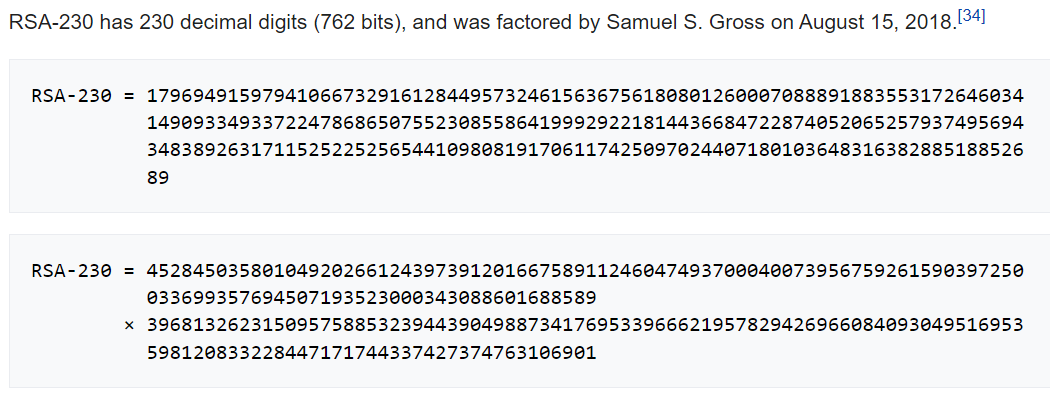

# Closing Remarks

#### Thank you for participating in this TKET workshop!

#### Please fill out the workshop survey: https://forms.office.com/r/b8N2XK20xf

#### If any questions arise, don't hesitate to contact me via email
[kathrin.spendier@quantinuum.com](mailto:kathrin.spendier@quantinuum.com). 

### pip install pytket!